## Import Necessary Libraries

-------------------------------

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import xgboost as xgb

import streamlit as st

-----------------------------------------------------------
## Load 'Online News Popularity' Dataset

-------------------------------

In [42]:
df = pd.read_csv("OnlineNewsPopularity.csv")

df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


-----------------------------------------------------------
## Drop 'Url' Column

-------------------------------

In [43]:
# Drop the 'url' column
df.drop(columns=['url'], inplace=True)

df

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


-----------------------------------------------------------
## Check for Duplicate Rows

-------------------------------

In [44]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


-----------------------------------------------------------
## Check Data Types

-------------------------------

In [45]:
# Print data types 
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

 timedelta: float64
 n_tokens_title: float64
 n_tokens_content: float64
 n_unique_tokens: float64
 n_non_stop_words: float64
 n_non_stop_unique_tokens: float64
 num_hrefs: float64
 num_self_hrefs: float64
 num_imgs: float64
 num_videos: float64
 average_token_length: float64
 num_keywords: float64
 data_channel_is_lifestyle: float64
 data_channel_is_entertainment: float64
 data_channel_is_bus: float64
 data_channel_is_socmed: float64
 data_channel_is_tech: float64
 data_channel_is_world: float64
 kw_min_min: float64
 kw_max_min: float64
 kw_avg_min: float64
 kw_min_max: float64
 kw_max_max: float64
 kw_avg_max: float64
 kw_min_avg: float64
 kw_max_avg: float64
 kw_avg_avg: float64
 self_reference_min_shares: float64
 self_reference_max_shares: float64
 self_reference_avg_sharess: float64
 weekday_is_monday: float64
 weekday_is_tuesday: float64
 weekday_is_wednesday: float64
 weekday_is_thursday: float64
 weekday_is_friday: float64
 weekday_is_saturday: float64
 weekday_is_sunday: float

-----------------------------------------------------------
## EDA Visualizations

-------------------------------

In [46]:
# duplicate dataframe for EDA
df_eda = df.copy()

In [47]:
# Summary Statistics

# Identify binary columns 
binary_columns = df_eda.columns[(df.isin([0, 1]).all())]

# Exclude binary columns from the DataFrame
non_binary_df = df_eda.drop(columns=binary_columns)

# Calculate summary statistics for non-binary numerical columns
summary_statistics = non_binary_df.describe()

print(summary_statistics)

          timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000      

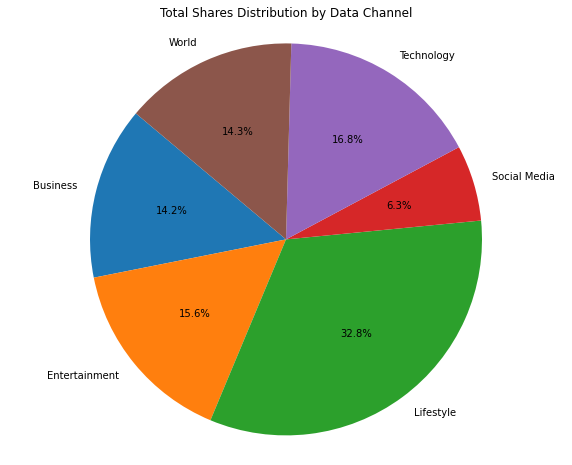

In [48]:
# Total Shares Distribution by Data Channel

# Mapping binary data channel features to channel names
channel_mapping = {
    ' data_channel_is_lifestyle': 'Lifestyle',
    ' data_channel_is_entertainment': 'Entertainment',
    ' data_channel_is_bus': 'Business',
    ' data_channel_is_socmed': 'Social Media',
    ' data_channel_is_tech': 'Technology',
    ' data_channel_is_world': 'World'
}

# Creating a new column 'channel' based on the binary data channel features
df_eda['channel'] = df_eda[[' data_channel_is_lifestyle', ' data_channel_is_entertainment',
                    ' data_channel_is_bus', ' data_channel_is_socmed',
                    ' data_channel_is_tech', ' data_channel_is_world']].idxmax(axis=1).map(channel_mapping)

# Grouping the data by 'channel' and calculating the total shares
shares_by_channel = df_eda.groupby('channel')[' shares'].sum().reset_index()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']


plt.figure(figsize=(10, 8), facecolor='white')  
plt.pie(shares_by_channel[' shares'], labels=shares_by_channel['channel'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Shares Distribution by Data Channel')
plt.axis('equal') 
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


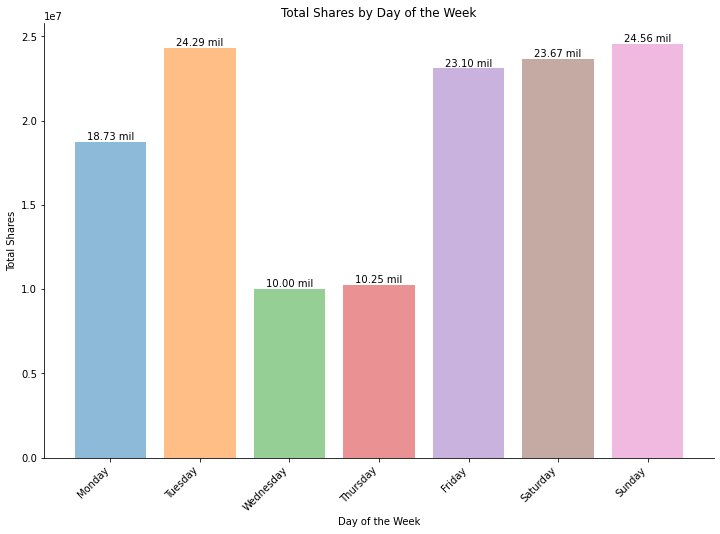

In [49]:
# Total Shares by Day of the Week

# Mapping binary weekday features to day names
day_mapping = {
    ' weekday_is_monday': 'Monday',
    ' weekday_is_tuesday': 'Tuesday',
    ' weekday_is_wednesday': 'Wednesday',
    ' weekday_is_thursday': 'Thursday',
    ' weekday_is_friday': 'Friday',
    ' weekday_is_saturday': 'Saturday',
    ' weekday_is_sunday': 'Sunday'
}

# Creating a new column 'day_of_week' based on the binary weekday features
df_eda['day_of_week'] = df_eda[[' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
                        ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
                        ' weekday_is_sunday']].idxmax(axis=1).map(day_mapping)

# Grouping the data by 'day_of_week' and calculating the total shares
shares_by_weekday = df_eda.groupby('day_of_week')[' shares'].sum().reset_index()


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


plt.figure(figsize=(12, 8))
bars = plt.bar(shares_by_weekday['day_of_week'], shares_by_weekday[' shares'], color=colors, alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height / 1e6:.2f} mil', ha='center', va='bottom')

plt.title('Total Shares by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Shares')
plt.xticks(shares_by_weekday['day_of_week'], labels=day_order, rotation=45, ha='right')
plt.legend().set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

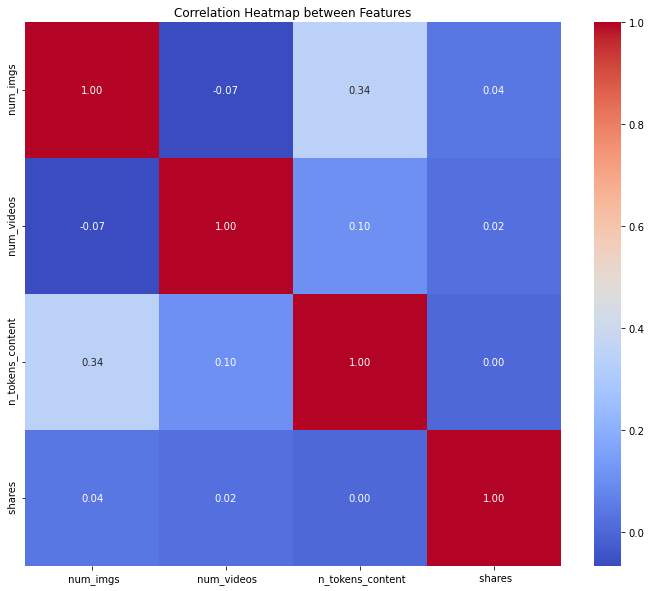

In [50]:
# Correlation Heatmap of Post Contents and Shares

# Selecting relevant features
features_of_interest = [' num_imgs', ' num_videos', ' n_tokens_content', ' shares']

# Calculating the correlation matrix
correlation_matrix = df_eda[features_of_interest].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Features')
plt.show()

-----------------------------------------------------------
## Check for Missing/Null Values

-------------------------------

In [51]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                      

-----------------------------------------------------------
## Data Discretization

-------------------------------

In [52]:
# Define the bins for different classes
bins = [0,10000, 100000, 1000000]

# Define the labels for the classes
labels = [0, 1, 2]

# Add a new column with classes based on the 'shares' column
df['shares_class'] = pd.cut(df[' shares'], bins=bins, labels=labels, include_lowest=True)

# Drop the old target variable (' shares')
df.drop(columns=[' shares'], inplace=True)

df

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_class
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,0
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,0
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,0
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,0


-----------------------------------------------------------
## Data Normalization

---------------------------------------------

In [53]:
# Separate features and target variable
X = df.drop(columns=['shares_class'])  
y = df['shares_class']  

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features except for the target variable
X_normalized = scaler.fit_transform(X)

# Create a DataFrame with the normalized features
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Add the target variable back to the DataFrame
df_normalized['shares_class'] = y


print("DataFrame after normalization:")
df_normalized

DataFrame after normalization:


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_class
0,1.0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.000000,...,0.100000,0.70,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500,0
1,1.0,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.000000,...,0.033333,0.70,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000,0
2,1.0,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.000000,...,0.100000,1.00,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000,0
3,1.0,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.000000,0.007812,0.000000,...,0.136364,0.80,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000,0
4,1.0,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.163793,0.156250,0.000000,...,0.033333,1.00,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.0,0.428571,0.040831,0.000755,0.00096,0.001054,0.029605,0.060345,0.007812,0.010989,...,0.100000,0.75,0.740000,0.500,0.875000,0.100000,0.500000,0.800000,0.000000,0
39640,0.0,0.476190,0.038707,0.000993,0.00096,0.001362,0.029605,0.060345,0.023438,0.527473,...,0.136364,0.70,0.788889,0.600,0.900000,0.300000,1.000000,0.400000,1.000000,0
39641,0.0,0.380952,0.052160,0.000737,0.00096,0.000991,0.078947,0.008621,0.093750,0.010989,...,0.136364,0.50,0.643561,0.200,0.833333,0.454545,0.568182,0.090909,0.136364,0
39642,0.0,0.190476,0.080481,0.000770,0.00096,0.001066,0.032895,0.008621,0.007812,0.000000,...,0.062500,0.50,0.794754,0.500,0.987500,0.000000,0.500000,1.000000,0.000000,0


In [54]:
# Count the number of rows in each target class
class_counts = df_normalized['shares_class'].value_counts()

# Display the counts
print("Class Counts:")
print(class_counts)

Class Counts:
0    37459
1     2127
2       58
Name: shares_class, dtype: int64


-----------------------------------------------------------
## SMOTE Analysis

----------------------------------------

In [55]:
# Separate features and target variable
X = df_normalized.drop(columns=['shares_class'])  
y = df_normalized['shares_class']  

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the class distribution
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
print("Class Counts after SMOTE:")
print(y_resampled.value_counts())

# Update the original DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['shares_class'] = y_resampled


print("DataFrame after SMOTE:")
df_resampled


Class Counts after SMOTE:
0    37459
1    37459
2    37459
Name: shares_class, dtype: int64
DataFrame after SMOTE:


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_class
0,1.000000,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.000000,...,0.100000,0.700000,0.650000,0.400000,0.800000,0.500000,0.406250,0.000000,0.187500,0
1,1.000000,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.000000,...,0.033333,0.700000,0.881250,0.875000,0.900000,0.000000,0.500000,1.000000,0.000000,0
2,1.000000,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.000000,...,0.100000,1.000000,0.533333,0.200000,0.866667,0.000000,0.500000,1.000000,0.000000,0
3,1.000000,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.000000,0.007812,0.000000,...,0.136364,0.800000,0.630303,0.400000,0.833333,0.000000,0.500000,1.000000,0.000000,0
4,1.000000,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.163793,0.156250,0.000000,...,0.033333,1.000000,0.779808,0.500000,0.950000,0.454545,0.568182,0.090909,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112372,0.658593,0.437179,0.045261,0.000820,0.00096,0.001008,0.065550,0.017241,0.128006,0.009932,...,0.118076,0.963848,0.594745,0.158166,0.895481,0.623150,0.565539,0.246300,0.131078,2
112373,0.688945,0.407081,0.062907,0.000751,0.00096,0.000963,0.087331,0.032118,0.125691,0.010989,...,0.068141,1.000000,0.809199,0.677101,0.931859,0.063717,0.404424,0.872565,0.191152,2
112374,0.528757,0.460602,0.029861,0.000938,0.00096,0.001239,0.027629,0.014419,0.047296,0.010989,...,0.132735,0.869059,0.615919,0.565470,0.767265,0.327352,0.581838,1.000000,0.163676,2
112375,0.636841,0.465411,0.072000,0.000760,0.00096,0.001031,0.086893,0.021959,0.090661,0.013476,...,0.050000,1.000000,0.743004,0.464184,0.950000,0.179226,0.406590,0.641548,0.277364,2


-----------------------------------------------------------
## Linear Discriminant Analysis

----------------------------------------

In [56]:
# Separate features and target variable
X = df_resampled.drop(columns=['shares_class'])  
y = df_resampled['shares_class']  

# Initialize LDA with the desired number of components
n_components = 2  
lda = LDA(n_components=n_components)

# Fit LDA to the features and transform them
X_lda = lda.fit_transform(X, y)

# Create a DataFrame with the LDA-transformed features
df_LDA = pd.DataFrame(data=X_lda, columns=[f"LDA_component_{i+1}" for i in range(X_lda.shape[1])])

# Add the target variable 'shares_class' to the DataFrame
df_LDA['shares_class'] = y

# Display the DataFrame with LDA-transformed features
print("DataFrame with LDA-transformed features:")
df_LDA

DataFrame with LDA-transformed features:


,LDA_component_1,LDA_component_2,shares_class
0,1.700210,-3.304487,0
1,2.141146,-4.231582,0
2,0.666135,-3.065038,0
3,2.258167,-3.419880,0
4,2.332140,-2.884107,0
...,...,...,...
112372,-1.898272,1.012633,2
112373,-1.305461,-0.358383,2
112374,-1.579120,0.764334,2
112375,-1.508288,-0.128847,2


-----------------------------------------------------------
## Principal Component Analysis

----------------------------------------

In [57]:
# Separate features and target variable
X = df_resampled.drop(columns=['shares_class'])  
y = df_resampled['shares_class']  

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with the desired number of components
n_components = 10 
pca = PCA(n_components=n_components)

# Fit PCA to the scaled features and transform them
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the transformed features
pca_columns = [f"PC{i+1}" for i in range(n_components)]
df_pca = pd.DataFrame(data=X_pca, columns=pca_columns)

# Add the target variable 'shares' to the DataFrame
df_pca['shares_class'] = y

df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,shares_class
0,1.716236,-2.434979,-0.140643,0.076521,0.020974,0.224327,3.190279,-2.497116,-1.636041,-2.059144,0
1,0.175573,-3.787198,-1.599600,1.442686,-1.481081,2.659052,3.002283,0.018814,-0.788614,-2.123540,0
2,3.603029,-3.346148,-2.351297,1.228620,-1.499652,1.848782,0.833654,-1.206126,-1.311064,-1.073924,0
3,1.616833,-2.966678,0.866067,-0.469946,0.378382,1.639703,1.404979,-3.548655,-1.001509,-1.873676,0
4,3.725930,-4.203930,-2.980610,-0.902432,0.784295,0.794272,-0.383267,-0.170193,1.796118,-0.751483,0
...,...,...,...,...,...,...,...,...,...,...,...
112372,1.608672,1.704731,0.345246,-0.426692,0.333886,-1.745696,0.280828,-0.087695,0.547661,-0.073611,2
112373,0.343387,0.157775,-0.906266,0.202995,-0.173534,-0.522033,-0.968578,-0.470682,1.423335,-0.677782,2
112374,0.922886,1.469377,-1.782030,1.017672,-0.787709,-1.408989,-1.236537,-0.913171,-1.178197,-0.055158,2
112375,0.588409,0.789737,-0.626357,0.060277,-0.082401,-1.079803,-0.303872,-0.102322,1.398594,-0.883474,2


-----------------------------------------------------------
## Train-Test Split for LDA and PCA 

----------------------------------------

In [58]:
# LDA train-test split

X = df_LDA.drop(columns=['shares_class']) 
y = df_LDA['shares_class'] 

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (89901, 2) (89901,)
Testing set shape: (22476, 2) (22476,)


In [59]:
# PCA train-test split

X = df_pca.drop(columns=['shares_class'])  
y = df_pca['shares_class'] 

# Split the data into training and testing sets (80% train, 20% test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train1.shape, y_train1.shape)
print("Testing set shape:", X_test1.shape, y_test1.shape)


Training set shape: (89901, 10) (89901,)
Testing set shape: (22476, 10) (22476,)


-----------------------------------------------------------
## Random Forest Model

----------------------------------------

Training and Testing on LDA Feature Selection:


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      7546
           1       0.59      0.56      0.58      7490
           2       0.81      0.90      0.85      7440

    accuracy                           0.69     22476
   macro avg       0.68      0.69      0.68     22476
weighted avg       0.68      0.69      0.68     22476

Accuracy: 0.6875
ROC AUC: 0.8533


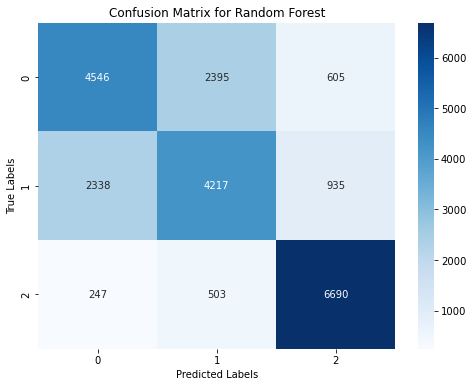

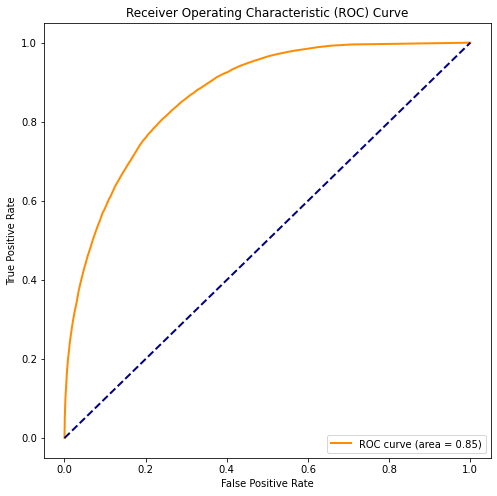

Training and Testing on PCA Feature Selection:
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      7546
           1       0.88      0.92      0.90      7490
           2       1.00      1.00      1.00      7440

    accuracy                           0.93     22476
   macro avg       0.93      0.93      0.93     22476
weighted avg       0.93      0.93      0.93     22476

Accuracy: 0.9309
ROC AUC: 0.9877


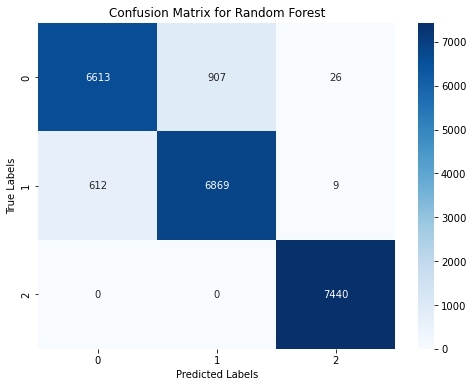

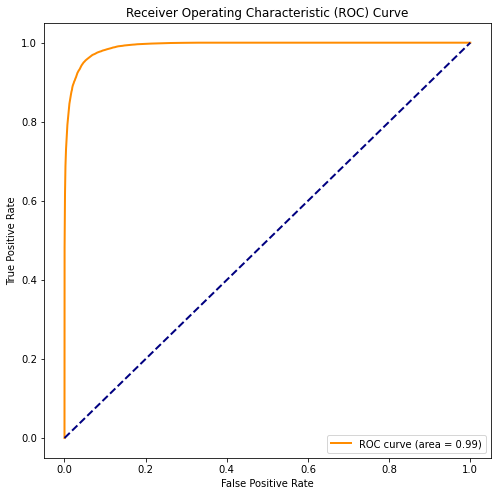

In [60]:
def train_test_model(X_train, X_test, y_train, y_test):
    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)

    # Fit the model to the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_classifier.predict(X_test)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Binarize the labels for multiclass ROC AUC
    y_test_bin = label_binarize(y_test, classes=rf_classifier.classes_)

    # Calculate ROC AUC for each class
    y_prob = rf_classifier.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for Random Forest')

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    plt.show()
    
    return accuracy, roc_auc


print("Training and Testing on LDA Feature Selection:")
lda_accuracy_rf, lda_auc_rf = train_test_model(X_train, X_test, y_train, y_test)

print("Training and Testing on PCA Feature Selection:")
pca_accuracy_rf, pca_auc_rf = train_test_model(X_train1, X_test1, y_train1, y_test1)

-----------------------------------------------------------
## Decision Tree Model

----------------------------------------

Training and Testing on LDA Feature Selection:
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      7546
           1       0.53      0.53      0.53      7490
           2       0.82      0.83      0.83      7440

    accuracy                           0.64     22476
   macro avg       0.64      0.64      0.64     22476
weighted avg       0.64      0.64      0.64     22476

Accuracy for Decision Tree: 0.6409
ROC AUC for Decision Tree: 0.7309


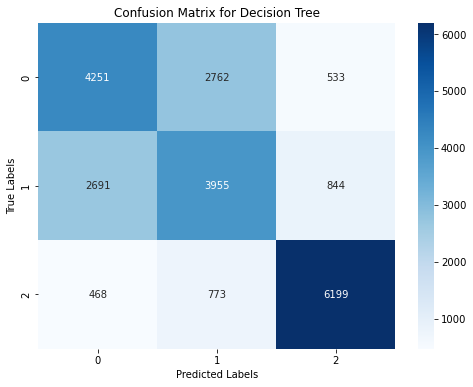

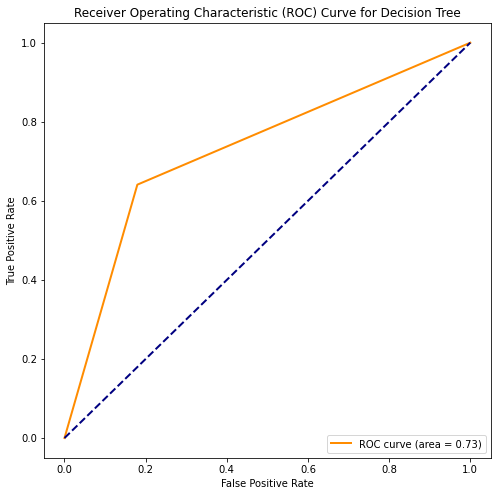

Training and Testing on PCA Feature Selection:
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      7546
           1       0.78      0.83      0.80      7490
           2       0.98      1.00      0.99      7440

    accuracy                           0.86     22476
   macro avg       0.86      0.86      0.86     22476
weighted avg       0.86      0.86      0.86     22476

Accuracy for Decision Tree: 0.8589
ROC AUC for Decision Tree: 0.8944


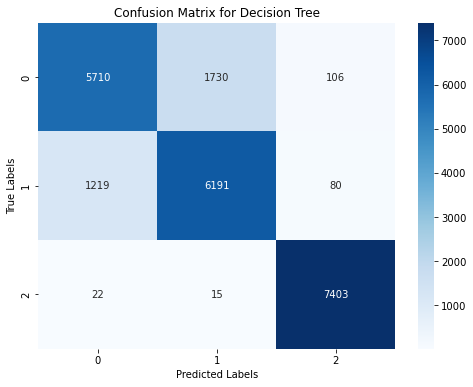

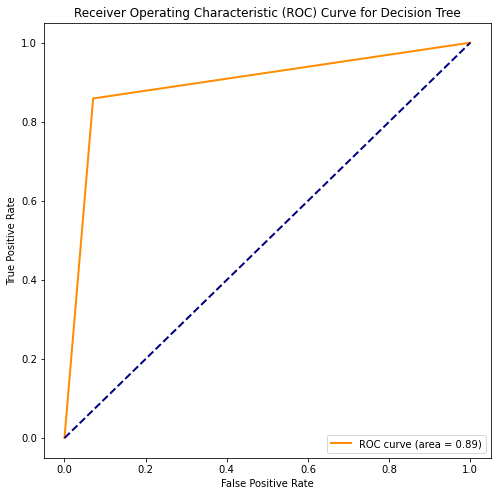

In [61]:
def train_test_model_decision_tree(X_train, X_test, y_train, y_test):
    # Initialize the Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(random_state = 42)

    # Fit the model to the training data
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred_dt = dt_classifier.predict(X_test)

    # Print classification report
    print("Classification Report for Decision Tree:")
    print(classification_report(y_test, y_pred_dt))

    # Calculate and print accuracy
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print(f"Accuracy for Decision Tree: {accuracy_dt:.4f}")

    # Binarize the labels for multiclass ROC AUC
    y_test_bin_dt = label_binarize(y_test, classes=dt_classifier.classes_)

    # Calculate ROC AUC for each class
    y_prob_dt = dt_classifier.predict_proba(X_test)
    roc_auc_dt = roc_auc_score(y_test_bin_dt, y_prob_dt, multi_class='ovr')
    print(f"ROC AUC for Decision Tree: {roc_auc_dt:.4f}")

    # Plot confusion matrix
    cm_dt = confusion_matrix(y_test, y_pred_dt)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for Decision Tree')

    # Plot ROC Curve
    fpr_dt, tpr_dt, _ = roc_curve(y_test_bin_dt.ravel(), y_prob_dt.ravel())
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
    plt.legend(loc='lower right')

    plt.show()

    return accuracy_dt, roc_auc_dt

print("Training and Testing on LDA Feature Selection:")
lda_accuracy_dt, lda_auc_dt = train_test_model_decision_tree(X_train, X_test, y_train, y_test)

print("Training and Testing on PCA Feature Selection:")
pca_accuracy_dt, pca_auc_dt = train_test_model_decision_tree(X_train1, X_test1, y_train1, y_test1)

-----------------------------------------------------------
## K Nearest Neighbors Model

----------------------------------------

Training and Testing on LDA Feature Selection:
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.61      0.66      0.64      7546
           1       0.60      0.48      0.53      7490
           2       0.80      0.89      0.84      7440

    accuracy                           0.68     22476
   macro avg       0.67      0.68      0.67     22476
weighted avg       0.67      0.68      0.67     22476

Accuracy for KNN: 0.6768
ROC AUC for KNN: 0.8425


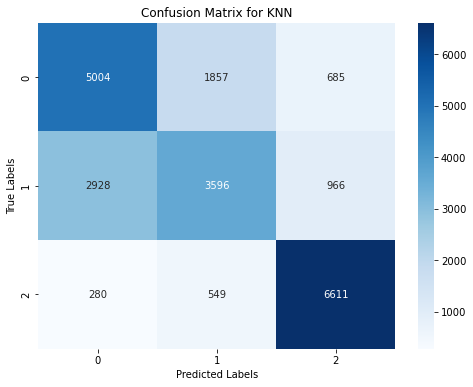

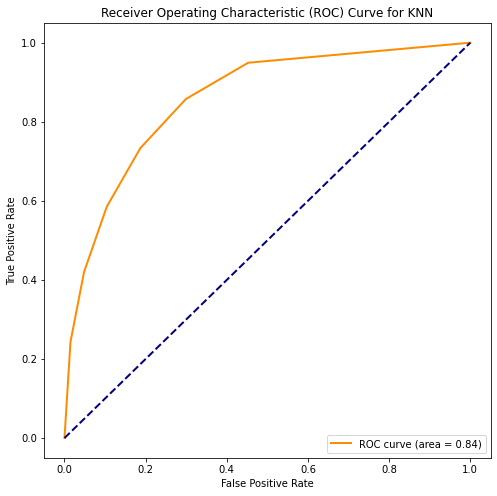

Training and Testing on PCA Feature Selection:
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      7546
           1       0.79      0.94      0.86      7490
           2       0.97      1.00      0.98      7440

    accuracy                           0.89     22476
   macro avg       0.90      0.89      0.89     22476
weighted avg       0.90      0.89      0.89     22476

Accuracy for KNN: 0.8893
ROC AUC for KNN: 0.9665


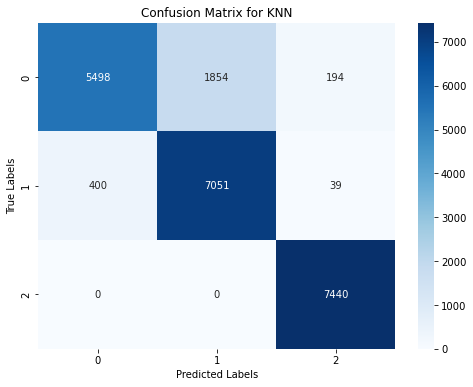

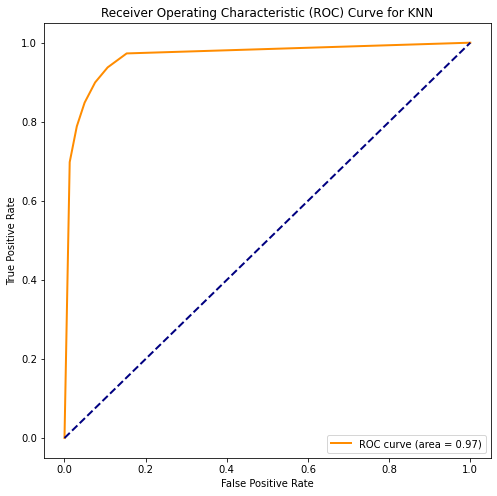

In [62]:
def train_test_model_knn(X_train, X_test, y_train, y_test):
    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=6)  

    # Fit the model to the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred_knn = knn_classifier.predict(X_test)

    # Print classification report
    print("Classification Report for KNN:")
    print(classification_report(y_test, y_pred_knn))

    # Calculate and print accuracy
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f"Accuracy for KNN: {accuracy_knn:.4f}")

    # Binarize the labels for multiclass ROC AUC
    y_test_bin_knn = label_binarize(y_test, classes=knn_classifier.classes_)

    # Calculate ROC AUC for each class
    y_prob_knn = knn_classifier.predict_proba(X_test)
    roc_auc_knn = roc_auc_score(y_test_bin_knn, y_prob_knn, multi_class='ovr')
    print(f"ROC AUC for KNN: {roc_auc_knn:.4f}")

    # Plot confusion matrix
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for KNN')

    # Plot ROC Curve
    fpr_knn, tpr_knn, _ = roc_curve(y_test_bin_knn.ravel(), y_prob_knn.ravel())
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
    plt.legend(loc='lower right')

    plt.show()

    return accuracy_knn, roc_auc_knn

print("Training and Testing on LDA Feature Selection:")
lda_accuracy_knn, lda_auc_knn = train_test_model_knn(X_train, X_test, y_train, y_test)

print("Training and Testing on PCA Feature Selection:")
pca_accuracy_knn, pca_auc_knn = train_test_model_knn(X_train1, X_test1, y_train1, y_test1)

-----------------------------------------------------------
## CatBoost Model

----------------------------------------

Training and Testing on LDA Feature Selection:
0:	learn: 0.6461775	test: 0.6469568	best: 0.6469568 (0)	total: 32ms	remaining: 31.9s
100:	learn: 0.6763329	test: 0.6845079	best: 0.6845079 (100)	total: 2.82s	remaining: 25.1s
200:	learn: 0.6802371	test: 0.6862876	best: 0.6866880 (183)	total: 5.82s	remaining: 23.1s
300:	learn: 0.6822394	test: 0.6878448	best: 0.6879338 (294)	total: 8.47s	remaining: 19.7s
400:	learn: 0.6838077	test: 0.6882007	best: 0.6885122 (372)	total: 11.4s	remaining: 17s
500:	learn: 0.6859879	test: 0.6888681	best: 0.6890016 (483)	total: 14.1s	remaining: 14.1s
600:	learn: 0.6881458	test: 0.6895800	best: 0.6897580 (520)	total: 16.8s	remaining: 11.2s
700:	learn: 0.6898588	test: 0.6904698	best: 0.6905143 (699)	total: 20.1s	remaining: 8.56s
800:	learn: 0.6913271	test: 0.6905143	best: 0.6911372 (739)	total: 23.1s	remaining: 5.73s
900:	learn: 0.6924061	test: 0.6914042	best: 0.6915376 (875)	total: 26.1s	remaining: 2.87s
999:	learn: 0.6933405	test: 0.6914487	best: 0.6915376 (875)	

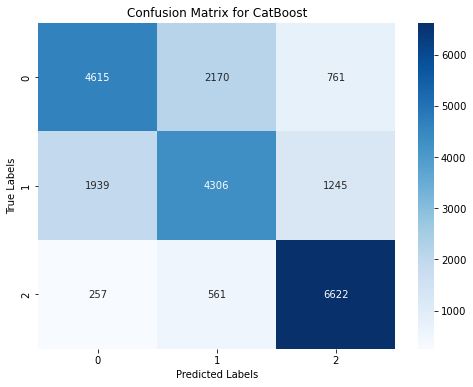

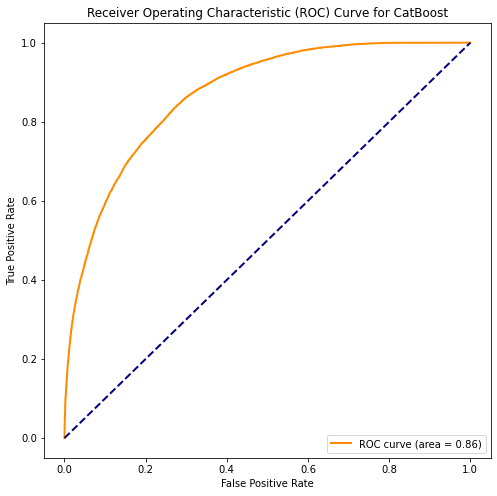

Training and Testing on PCA Feature Selection:
0:	learn: 0.5542875	test: 0.5469834	best: 0.5469834 (0)	total: 42.9ms	remaining: 42.8s
100:	learn: 0.7500806	test: 0.7448389	best: 0.7452839 (99)	total: 4.42s	remaining: 39.3s
200:	learn: 0.7910924	test: 0.7828350	best: 0.7828350 (200)	total: 8.55s	remaining: 34s
300:	learn: 0.8160310	test: 0.8036572	best: 0.8038797 (298)	total: 12.6s	remaining: 29.2s
400:	learn: 0.8323712	test: 0.8164709	best: 0.8164709 (400)	total: 16.6s	remaining: 24.8s
500:	learn: 0.8461419	test: 0.8279498	best: 0.8279498 (500)	total: 20.6s	remaining: 20.6s
600:	learn: 0.8559082	test: 0.8354689	best: 0.8354689 (600)	total: 24.7s	remaining: 16.4s
700:	learn: 0.8656745	test: 0.8435665	best: 0.8435665 (700)	total: 28.7s	remaining: 12.3s
800:	learn: 0.8733051	test: 0.8493059	best: 0.8493504 (799)	total: 33.7s	remaining: 8.37s
900:	learn: 0.8801682	test: 0.8525983	best: 0.8528653 (892)	total: 37.9s	remaining: 4.16s
999:	learn: 0.8872204	test: 0.8574479	best: 0.8574479 (999)

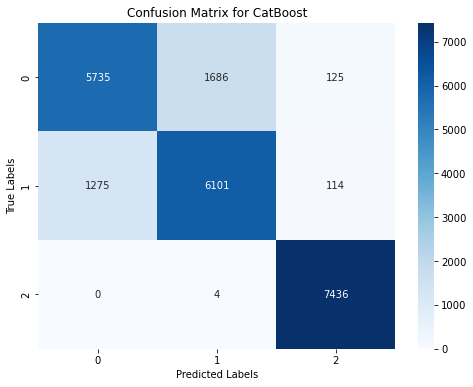

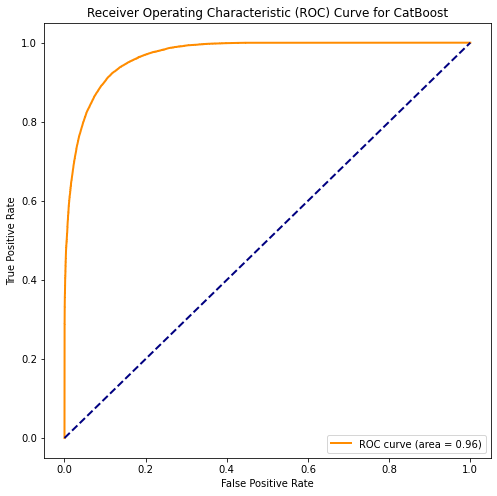

In [63]:
def train_test_model_catboost(X_train, X_test, y_train, y_test):
    # Initialize the CatBoost classifier
    catboost_classifier = CatBoostClassifier(
        iterations=1000,  
        learning_rate=0.1,  
        loss_function='MultiClass',
        eval_metric='Accuracy',
        random_seed=42,
        verbose=100
    )

    # Fit the model to the training data
    catboost_classifier.fit(X_train, y_train, eval_set=(X_test, y_test))

    # Make predictions on the testing data
    y_pred_catboost = catboost_classifier.predict(X_test)

    # Print classification report
    print("Classification Report for CatBoost:")
    print(classification_report(y_test, y_pred_catboost))

    # Calculate and print accuracy
    accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
    print(f"Accuracy for CatBoost: {accuracy_catboost:.4f}")

    # Binarize the labels for multiclass ROC AUC
    y_test_bin_catboost = label_binarize(y_test, classes=catboost_classifier.classes_)

    # Calculate ROC AUC for each class
    y_prob_catboost = catboost_classifier.predict_proba(X_test)
    roc_auc_catboost = roc_auc_score(y_test_bin_catboost, y_prob_catboost, multi_class='ovr')
    print(f"ROC AUC for CatBoost: {roc_auc_catboost:.4f}")

    # Plot confusion matrix
    cm_catboost = confusion_matrix(y_test, y_pred_catboost)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues', xticklabels=catboost_classifier.classes_, yticklabels=catboost_classifier.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for CatBoost')

    # Plot ROC Curve
    fpr_catboost, tpr_catboost, _ = roc_curve(y_test_bin_catboost.ravel(), y_prob_catboost.ravel())
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_catboost, tpr_catboost, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_catboost))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for CatBoost')
    plt.legend(loc='lower right')

    plt.show()

    return accuracy_catboost, roc_auc_catboost

print("Training and Testing on LDA Feature Selection:")
lda_accuracy_catboost, lda_auc_catboost = train_test_model_catboost(X_train, X_test, y_train, y_test)

print("Training and Testing on PCA Feature Selection:")
pca_accuracy_catboost, pca_auc_catboost = train_test_model_catboost(X_train1, X_test1, y_train1, y_test1)

-----------------------------------------------------------
## XGBoost Model

----------------------------------------

Training and Testing on LDA Feature Selection:
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63      7546
           1       0.60      0.57      0.59      7490
           2       0.79      0.91      0.85      7440

    accuracy                           0.69     22476
   macro avg       0.69      0.69      0.69     22476
weighted avg       0.69      0.69      0.69     22476

Accuracy for XGBoost: 0.6931
ROC AUC for XGBoost: 0.8585


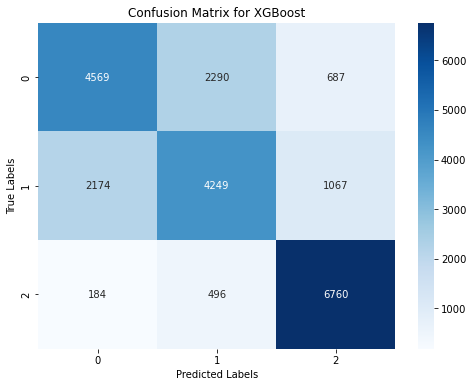

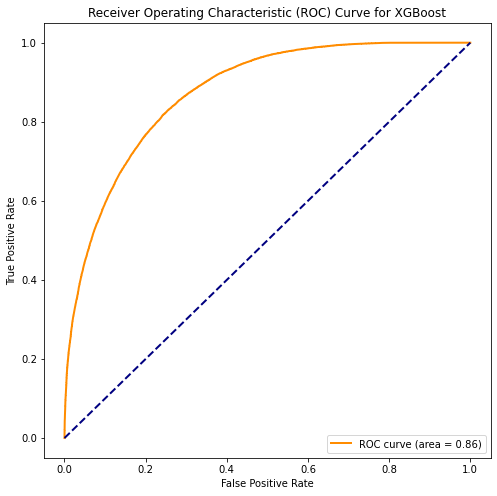

Training and Testing on PCA Feature Selection:
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7546
           1       0.86      0.92      0.89      7490
           2       0.99      1.00      1.00      7440

    accuracy                           0.92     22476
   macro avg       0.92      0.92      0.92     22476
weighted avg       0.92      0.92      0.92     22476

Accuracy for XGBoost: 0.9233
ROC AUC for XGBoost: 0.9851


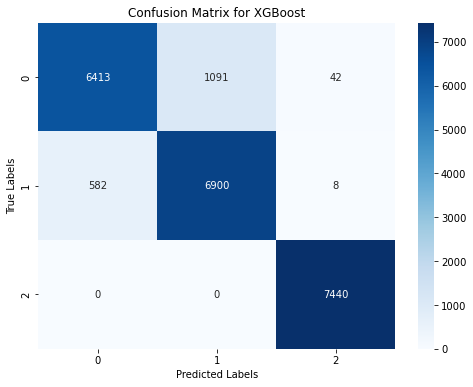

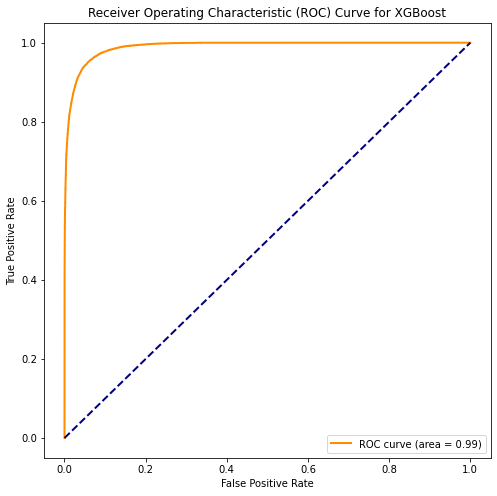

In [64]:
def train_test_model_xgboost(X_train, X_test, y_train, y_test):
    # Initialize the XGBoost classifier with base parameters
    xgb_classifier = xgb.XGBClassifier(
        objective='multi:softmax',  
        num_class=len(set(y_train)),  
        random_state=42,  
        n_estimators=150, 
        max_depth=10,  
    )

    # Fit the model to the training data
    xgb_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred_xgboost = xgb_classifier.predict(X_test)

    # Print classification report
    print("Classification Report for XGBoost:")
    print(classification_report(y_test, y_pred_xgboost))

    # Calculate and print accuracy
    accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
    print(f"Accuracy for XGBoost: {accuracy_xgboost:.4f}")

    # Binarize the labels for multiclass ROC AUC
    y_test_bin_xgboost = label_binarize(y_test, classes=xgb_classifier.classes_)

    # Calculate ROC AUC for each class
    y_prob_xgboost = xgb_classifier.predict_proba(X_test)
    roc_auc_xgboost = roc_auc_score(y_test_bin_xgboost, y_prob_xgboost, multi_class='ovr')
    print(f"ROC AUC for XGBoost: {roc_auc_xgboost:.4f}")

    # Plot confusion matrix
    cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_xgboost, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_classifier.classes_, yticklabels=xgb_classifier.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for XGBoost')

    # Plot ROC Curve
    fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test_bin_xgboost.ravel(), y_prob_xgboost.ravel())
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_xgboost, tpr_xgboost, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xgboost))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
    plt.legend(loc='lower right')

    plt.show()

    return accuracy_xgboost, roc_auc_xgboost

print("Training and Testing on LDA Feature Selection:")
lda_accuracy_xgboost, lda_auc_xgboost = train_test_model_xgboost(X_train, X_test, y_train, y_test)

print("Training and Testing on PCA Feature Selection:")
pca_accuracy_xgboost, pca_auc_xgboost = train_test_model_xgboost(X_train1, X_test1, y_train1, y_test1)

-----------------------------------------------------------
## Comparison Graphs

----------------------------------------

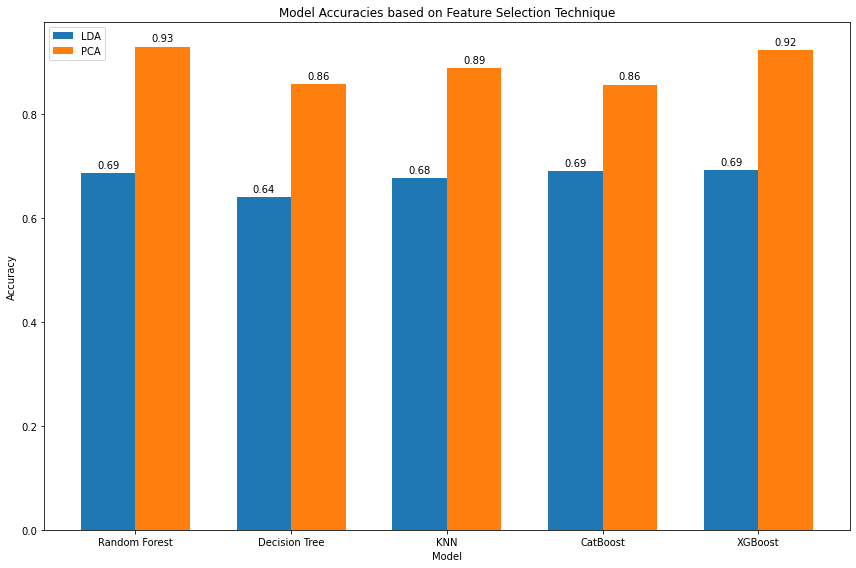

In [65]:
models = ['Random Forest', 'Decision Tree', 'KNN', 'CatBoost', 'XGBoost']
lda_accuracies = [lda_accuracy_rf, lda_accuracy_dt, lda_accuracy_knn, lda_accuracy_catboost, lda_accuracy_xgboost]
pca_accuracies = [pca_accuracy_rf, pca_accuracy_dt, pca_accuracy_knn, pca_accuracy_catboost, pca_accuracy_xgboost]

x = np.arange(len(models)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, lda_accuracies, width, label='LDA')
rects2 = ax.bar(x + width/2, pca_accuracies, width, label='PCA')


ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies based on Feature Selection Technique')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Text label above each bar displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

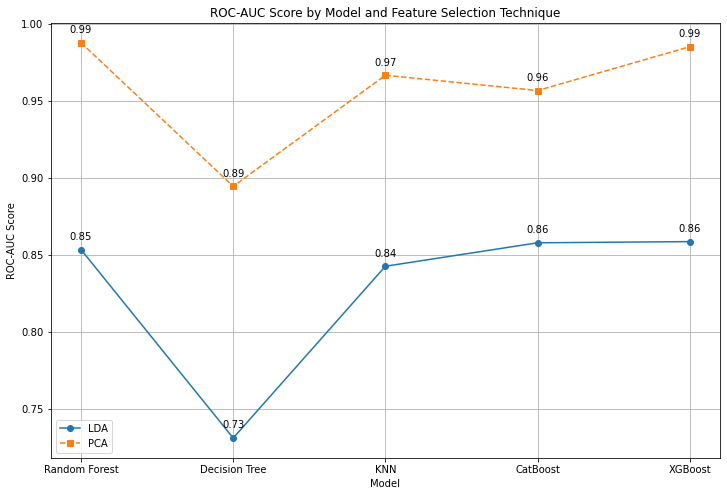

In [66]:
models = ['Random Forest', 'Decision Tree', 'KNN', 'CatBoost', 'XGBoost']
lda_auc_scores = [lda_auc_rf, lda_auc_dt, lda_auc_knn, lda_auc_catboost, lda_auc_xgboost]
pca_auc_scores = [pca_auc_rf, pca_auc_dt, pca_auc_knn, pca_auc_catboost, pca_auc_xgboost]

x = np.arange(len(models)) 


plt.figure(figsize=(12, 8))
plt.plot(x, lda_auc_scores, marker='o', linestyle='-', label='LDA')
plt.plot(x, pca_auc_scores, marker='s', linestyle='--', label='PCA')

plt.xlabel('Model')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Score by Model and Feature Selection Technique')
plt.xticks(x, models)
plt.legend()
plt.grid(True)

# Text labels on the plot
for i, txt in enumerate(lda_auc_scores):
    plt.annotate(round(txt, 2), (x[i], lda_auc_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(pca_auc_scores):
    plt.annotate(round(txt, 2), (x[i], pca_auc_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()